In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
tree_df = pd.DataFrame({'today':[0.0] * numrows,
                             'tomorrow':[0.0] * numrows}) #initalize as boolean

#sort columns for convience
seq = ['today',
       'tomorrow']

tree_df = tree_df.reindex(columns=seq)


In [32]:
#populate the regression data frame with values from the pandas dataframe
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    tree_df.iat[i,1] = tomorrow
    tree_df.iat[i,0] = today

tree_df = tree_df.dropna() #exclude any rows with missing data

In [34]:
tree_df.head()

,today,tomorrow
0,0.00,0.47
1,0.47,0.59
2,0.59,0.42
3,0.42,0.31
4,0.31,0.17


In [35]:
#modify the data to work with this model
x = tree_df.today.values
y = tree_df.tomorrow.values
x = x.reshape(tree_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(tree_df)

PCA(n_components=2)

In [38]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [39]:
print(pca.explained_variance_)

[0.07463308 0.03965335]


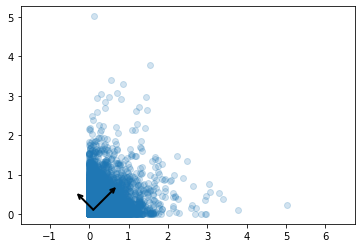

In [40]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(x, y, alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

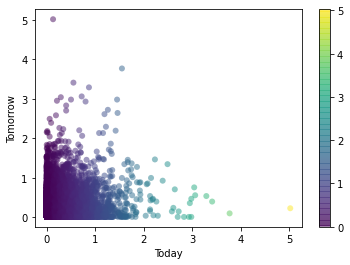

In [41]:
plt.scatter(x, y,
            c=tree_df.today, edgecolor='none', alpha=0.5)
plt.xlabel('Today')
plt.ylabel('Tomorrow')
plt.colorbar();